# Optimizing the Product Portfolio for the Internet Service Provider

## Table of Contents
1. [Introduction](#introduction)
2. [Analysis Overview](#analysis-overview)
3. [Question A: Likely Uptake or Purchase Rate of New Products](#question-a)
4. [Question B: Customer Conversion Prediction](#question-b)
5. [Question C: Location-Based Promotion Strategy](#question-c)
6. [Question D: Potential for Further Optimization](#question-d)
7. [Recommendations](#recommendations)
8. [Conclusion](#conclusion)

## Introduction
The Internet Service Provider (ISP) is facing challenges with its extensive product portfolio. This has resulted in operational complexities, increased costs, and inefficiencies. The goal is to streamline the product portfolio without negatively impacting revenue.

**Key Concerns:**
- Complexity for customer service agents and technicians
- Increased personnel, system resources, and promotional budgets
- Marginal growth in revenue

**Objective:**
To assist the Head of Products in making an informed decision regarding the proposed streamlined product portfolio by analyzing key metrics and data-driven insights.

## Analysis Overview
To address the concerns and provide a comprehensive recommendation, we will answer the following questions:
- What will be the likely uptake or purchase rate of the new products in the portfolio?
- Which customers are most likely to convert to the new products for targeted campaigns?
- In which locations should new product promotions be run?
- Is there any potential for optimizing the proposed product portfolio further?

## Question A: Likely Uptake or Purchase Rate of New Products


## Install Necessary Libraries

In [1]:
!pip install matplotlib
!pip install seaborn
!pip install tqdm

In [4]:
# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm import tqdm

In [5]:
import boto3
import pandas as pd
from io import BytesIO,  StringIO

# Initialize a boto3 client with your AWS credentials
# Access key ID & Secret access key shared in your mail
s3_client = boto3.client(
    's3',
    aws_access_key_id='your_aws_access_key_id',
    aws_secret_access_key='your_aws_secret_access_key'
)

### Read  CSV file from S3
# Specify your  AWS S3 bucket  name
bucket_name = 'datathon-3.0'
read_file_name = 'Q1-customers.csv'

# Get the object from the bucket
response = s3_client.get_object(Bucket=bucket_name, Key=read_file_name)

# Read the object (which is in bytes) into a DataFrame
df = pd.read_csv(BytesIO(response['Body'].read()))
# ### write CSV file to S3
# write_file_name = 'file name for write'

# # Convert the dataframe to CSV
# csv_buffer = StringIO()
# df.to_csv(csv_buffer, index = False)

# # Write the CSV data to S3
# s3_client.put_object(Bucket=bucket_name, Key=write_file_name, Body=csv_buffer.getvalue())

In [6]:
## Data Read Fn
def data_read(file_name):   
    '''
    This Functions Reads a csv file from datathon3.0 bucket.
    file name : file name of the csv to be read.
    '''
    # Initialize a boto3 client with your AWS credentials
    # Access key ID & Secret access key shared in your mail
    s3_client = boto3.client(
    's3',
    aws_access_key_id='your_aws_access_key_id',
    aws_secret_access_key='your_aws_secret_access_key'
)
    
    ### Read  CSV file from S3
    # Specify your  AWS S3 bucket  name
    bucket_name = 'datathon-3.0'
    read_file_name = file_name
    
    # Get the object from the bucket
    response = s3_client.get_object(Bucket=bucket_name, Key=read_file_name)
    
    # Read the object (which is in bytes) into a DataFrame
    return pd.read_csv(BytesIO(response['Body'].read()))

In [7]:
## Import Data
q1_customer = data_read('Q1-customers.csv')
sample_subq1 = data_read('Q1-submission.csv')

q2_new_prod = data_read('Q2-new-products.csv')
sample_subq2 = data_read('Q2-submission.csv')

sample_subq4A = data_read('Q4A-submission.csv')
sample_subq4B = data_read('Q4B-submission.csv')

df_cp = data_read('TBL_CUSTOMER_PROFILE.csv')
df_dc = data_read('TBL_DATA_CONSUMPTION.csv')
df_pp = data_read('TBL_PACK_PURCHASE.csv')
df_pc = data_read('TBL_PRODUCT_CATALOGUE.csv')

# EDA

### customer profile info

In [8]:
df_cp.head(2)

,CUSTOMER_ID,SERVICE_TYPE,FIRST_CONNECTION_DATE,CONNECTION_TYPE,ROUTER_CATEGORY,STREAMING_VOL_PERCENTAGE,WEB_BROWSING_VOL_PERCENTAGE,IM_VOICE_CALL_VOL_PERCENTAGE,SNS_VOL_PERCENTAGE,FILE_ACCESS_VOL_PERCENTAGE,GAME_VOL_PERCENTAGE,NAVIGATION_VOL_PERCENTAGE,EMAIL_VOL_PERCENTAGE,OTHERS_VOL_PERCENTAGE
0,CD1F7653F6BE80,Standard,20191231,Fiber Optic,Low End,70.0205,14.6609,3.6914,8.5530,2.1653,0.0297,0.0376,0.0,0.8416
1,CD1F768EE45143,Standard,20211107,Cable Broadband,High End,72.1494,11.6056,3.2767,1.6749,10.2768,0.0000,0.2096,0.0,0.8069


In [9]:
df_cp.isna().sum()

CUSTOMER_ID                        0
SERVICE_TYPE                       0
FIRST_CONNECTION_DATE              0
CONNECTION_TYPE                    0
ROUTER_CATEGORY                    0
STREAMING_VOL_PERCENTAGE        1946
WEB_BROWSING_VOL_PERCENTAGE     1946
IM_VOICE_CALL_VOL_PERCENTAGE    1946
SNS_VOL_PERCENTAGE              1946
FILE_ACCESS_VOL_PERCENTAGE      1946
GAME_VOL_PERCENTAGE             1946
NAVIGATION_VOL_PERCENTAGE       1946
EMAIL_VOL_PERCENTAGE            1946
OTHERS_VOL_PERCENTAGE           1946
dtype: int64

In [10]:
df_cp.dropna(inplace=True)

In [11]:
df_cp.ROUTER_CATEGORY.value_counts()

ROUTER_CATEGORY
Low End     232475
High End    108222
Name: count, dtype: int64

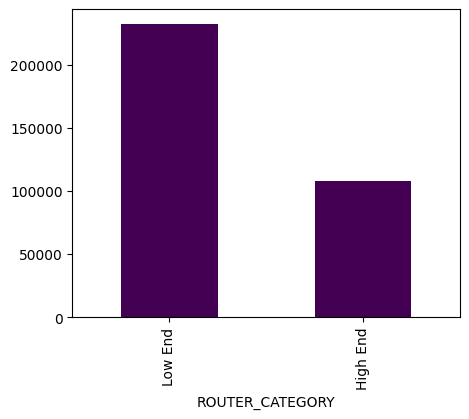

In [12]:
fig = plt.subplots(figsize=(5, 4))
df_cp.ROUTER_CATEGORY.value_counts().plot(kind='bar', cmap='viridis');

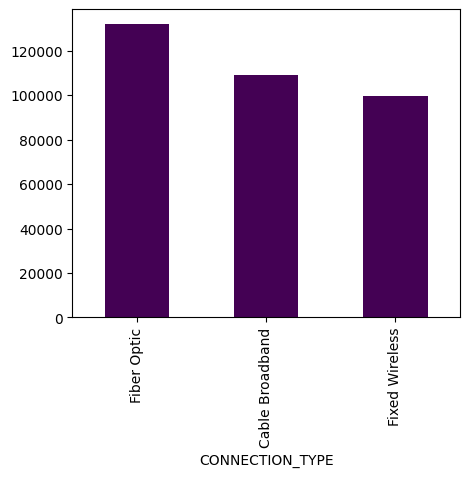

In [13]:
fig = plt.subplots(figsize=(5, 4))
df_cp.CONNECTION_TYPE.value_counts().plot(kind='bar', cmap='viridis');

In [14]:
df_cp['FIRST_CONNECTION_DATE'] = pd.to_datetime(df_cp['FIRST_CONNECTION_DATE'], format='%Y%m%d')
df_cp['year'] = df_cp['FIRST_CONNECTION_DATE'].dt.year

df_cp.head()

,CUSTOMER_ID,SERVICE_TYPE,FIRST_CONNECTION_DATE,CONNECTION_TYPE,ROUTER_CATEGORY,STREAMING_VOL_PERCENTAGE,WEB_BROWSING_VOL_PERCENTAGE,IM_VOICE_CALL_VOL_PERCENTAGE,SNS_VOL_PERCENTAGE,FILE_ACCESS_VOL_PERCENTAGE,GAME_VOL_PERCENTAGE,NAVIGATION_VOL_PERCENTAGE,EMAIL_VOL_PERCENTAGE,OTHERS_VOL_PERCENTAGE,year
0,CD1F7653F6BE80,Standard,2019-12-31,Fiber Optic,Low End,70.0205,14.6609,3.6914,8.5530,2.1653,0.0297,0.0376,0.0000,0.8416,2019
1,CD1F768EE45143,Standard,2021-11-07,Cable Broadband,High End,72.1494,11.6056,3.2767,1.6749,10.2768,0.0000,0.2096,0.0000,0.8069,2021
2,CD1F769AD050BF,Standard,2023-01-12,Fiber Optic,High End,47.3220,18.2921,3.2387,20.0176,3.9060,0.0180,0.0540,0.0506,7.1010,2023
3,CD1F769C960283,Standard,2022-06-11,Cable Broadband,Low End,41.2983,26.2252,4.2466,22.3891,0.8242,0.0009,0.0061,0.0000,5.0095,2022
4,CD1F77E09E8A7A,Standard,2022-09-20,Fiber Optic,Low End,32.0709,59.0923,3.6369,4.9594,0.0000,0.0000,0.0000,0.0000,0.2405,2022


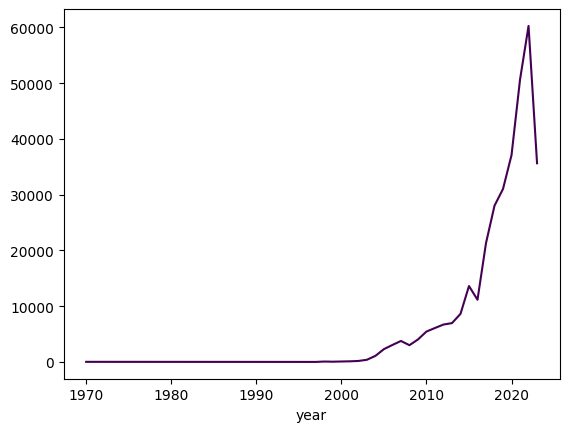

In [15]:
df_cp.year.value_counts().sort_index().plot(kind='line', cmap='viridis');

In [16]:
# df_cp.year.value_counts().sort_index()

In [17]:
xli = df_cp['STREAMING_VOL_PERCENTAGE'].tolist()
xli[:4]

[70.0205, 72.1494, 47.322, 41.2983]

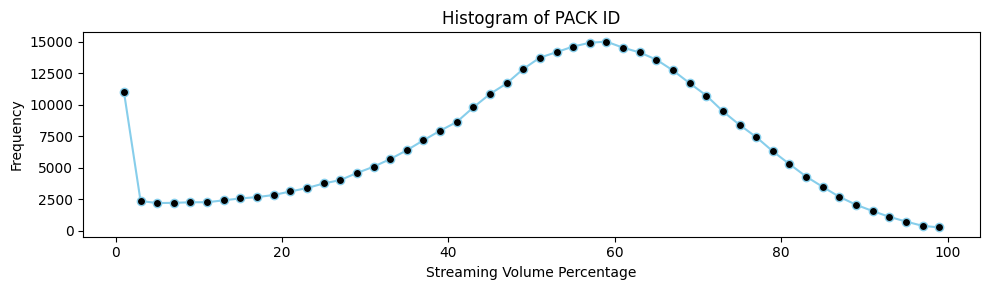

In [18]:
# plt.figure(figsize=(10, 3))
# plt.hist(xli, bins=20, color='skyblue', edgecolor='black')
# plt.xlabel('Streaming Volume Percentage')
# plt.ylabel('Frequency')
# plt.title('Histogram of Streaming Volume Percentage')
# plt.grid(False)
# plt.show()
# Calculate the histogram data
counts, bin_edges = np.histogram(xli, bins=50)

# Calculate the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the histogram as a line plot
plt.figure(figsize=(10, 3))
plt.plot(bin_centers, counts, color='skyblue', linestyle='-', marker='o', markerfacecolor='black')

# Adding titles and labels
plt.xlabel('Streaming Volume Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of PACK ID')

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()

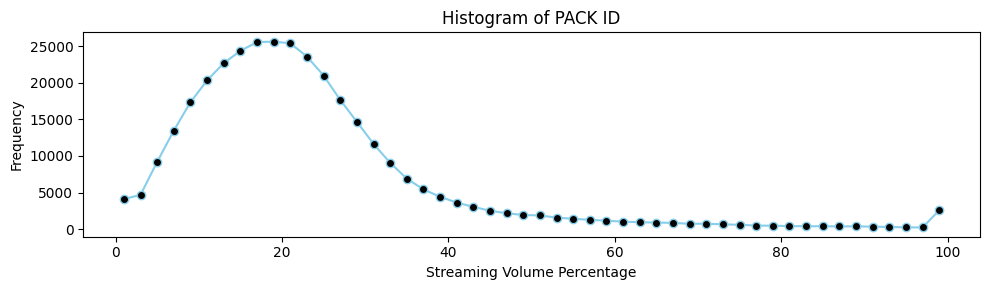

In [19]:
xli = df_cp['WEB_BROWSING_VOL_PERCENTAGE'].tolist()
# plt.figure(figsize=(10, 3))
# plt.hist(xli, bins=20, color='skyblue', edgecolor='black')
# plt.xlabel('Streaming Volume Percentage')
# plt.ylabel('Frequency')
# plt.title('Histogram of Streaming Volume Percentage')
# plt.grid(False)
# plt.show()
# Calculate the histogram data
counts, bin_edges = np.histogram(xli, bins=50)

# Calculate the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the histogram as a line plot
plt.figure(figsize=(10, 3))
plt.plot(bin_centers, counts, color='skyblue', linestyle='-', marker='o', markerfacecolor='black')

# Adding titles and labels
plt.xlabel('Streaming Volume Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of PACK ID')

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()

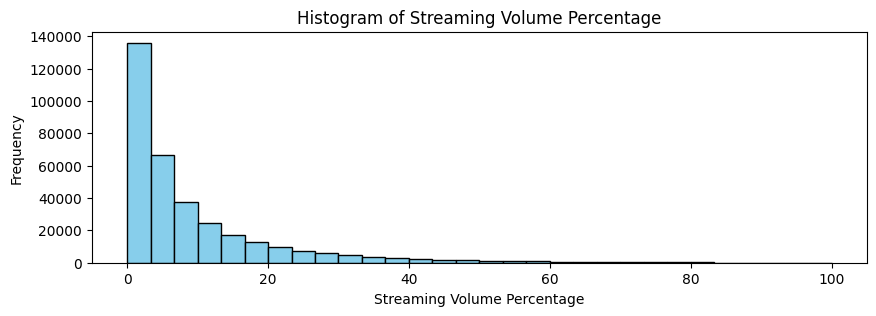

In [20]:
xli = df_cp['IM_VOICE_CALL_VOL_PERCENTAGE'].tolist()
plt.figure(figsize=(10, 3))
plt.hist(xli, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Streaming Volume Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of Streaming Volume Percentage')
plt.grid(False)
plt.show()

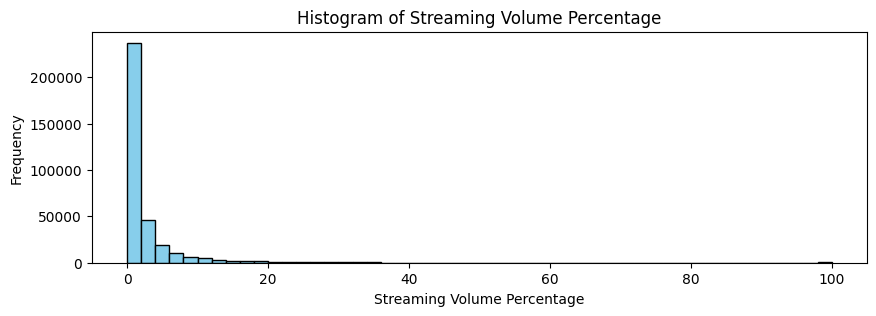

In [21]:
xli = df_cp['OTHERS_VOL_PERCENTAGE'].tolist()
plt.figure(figsize=(10, 3))
plt.hist(xli, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Streaming Volume Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of Streaming Volume Percentage')
plt.grid(False)
plt.show()

### Convert Categorical column to Numerical

In [22]:
mapping_dict = {'Premium': 0, 'Standard': 1}
mapping_dict2 = {'Fiber Optic': 0, 'Cable Broadband': 1, 'Fixed Wireless' :  2}
mapping_dict3 = {'Low End': 0, 'High End': 1}


# Replace the values in the 'subscription_type' column using the dictionary
df_cp['SERVICE_TYPE'] = df_cp['SERVICE_TYPE'].map(mapping_dict)
df_cp['CONNECTION_TYPE'] = df_cp['CONNECTION_TYPE'].map(mapping_dict2)
df_cp['ROUTER_CATEGORY'] = df_cp['ROUTER_CATEGORY'].map(mapping_dict3)

In [23]:
df_cp.ROUTER_CATEGORY.value_counts()

ROUTER_CATEGORY
0    232475
1    108222
Name: count, dtype: int64

In [24]:
df_cp.CUSTOMER_ID.nunique(), df_cp.shape

(340697, (340697, 15))

### data consumption info


In [25]:
print(df_dc.shape)
df_dc['EVENT_DATE'] = pd.to_datetime(df_dc['EVENT_DATE'], format='%Y%m%d')

df_dc.head(3)

(23375373, 4)


,EVENT_DATE,CUSTOMER_ID,TOTAL_VOLUME_GB,VOLUME_GB_IN_HIGH_BANDWIDTH
0,2019-09-14,CD1F7653F6BE80,14.2695,14.2695
1,2019-09-16,CD1F7653F6BE80,22.2891,22.2891
2,2019-07-16,CD1F7653F6BE80,26.3086,26.3086


In [26]:
df_dc['year'] = df_dc['EVENT_DATE'].dt.year
df_dc['month'] = df_dc['EVENT_DATE'].dt.month

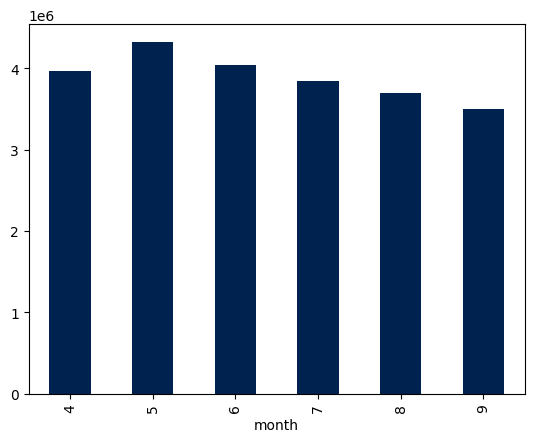

In [27]:
df_dc.month.value_counts().sort_index().plot(kind='bar', cmap='cividis');

## Pack purchase Info

In [28]:
print(df_pp.shape)
df_pp.head(4)

(1208710, 4)


,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS
0,20190703,CD20EDFC8000A7,1756,1
1,20190522,CD1F932E0A89C1,1524,1
2,20190522,CD201715F62164,1524,1
3,20190623,CD1F7B4DD83C5B,1524,1


In [29]:
df_pp['EVENT_DATE'] = pd.to_datetime(df_pp['EVENT_DATE'], format='%Y%m%d')

# Extract the year, month, and day into separate columns
df_pp['year'] = df_pp['EVENT_DATE'].dt.year
df_pp['month'] = df_pp['EVENT_DATE'].dt.month
# df_pp['day'] = df_pp['EVENT_DATE'].dt.day


In [30]:
df_pp.head()

,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS,year,month
0,2019-07-03,CD20EDFC8000A7,1756,1,2019,7
1,2019-05-22,CD1F932E0A89C1,1524,1,2019,5
2,2019-05-22,CD201715F62164,1524,1,2019,5
3,2019-06-23,CD1F7B4DD83C5B,1524,1,2019,6
4,2019-05-23,CD1F7BD12742B8,1524,1,2019,5


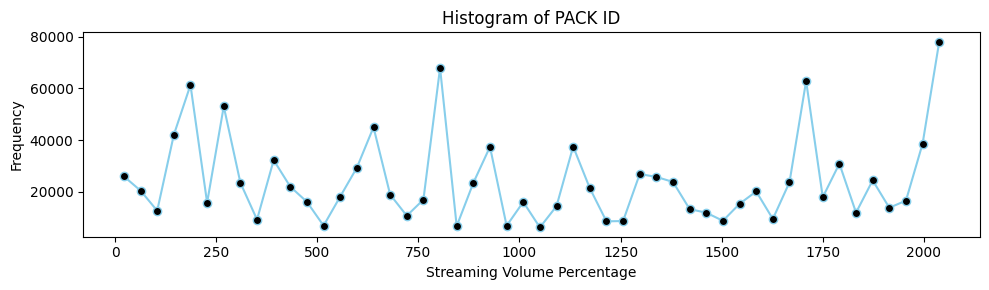

In [31]:
xli = df_pp['PACK_ID'].tolist()

# Calculate the histogram data
counts, bin_edges = np.histogram(xli, bins=50)

# Calculate the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the histogram as a line plot
plt.figure(figsize=(10, 3))
plt.plot(bin_centers, counts, color='skyblue', linestyle='-', marker='o', markerfacecolor='black')

# Adding titles and labels
plt.xlabel('Streaming Volume Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of PACK ID')

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()

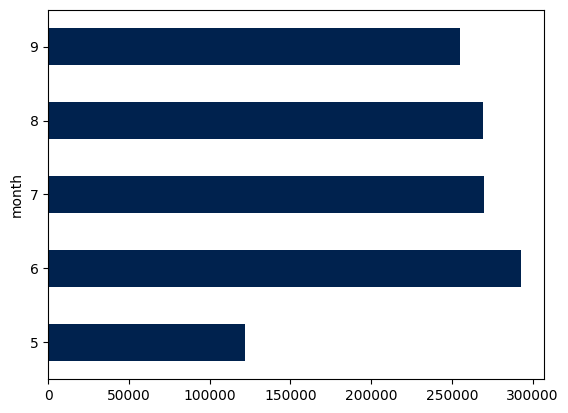

In [32]:
df_pp.month.value_counts().sort_index().plot(kind='barh', cmap='cividis');

In [33]:
df_pp.CUSTOMER_ID.nunique()

342635

## product catalogue

In [34]:
## product catalogue
print(df_pc.shape)
df_pc.head(2)

(2049, 7)


,PACK_ID,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS
0,1,Standard,Digital Wallets,1298,30,320.0,Discontinue
1,2,Standard,Cash,328,30,24.0,Continue


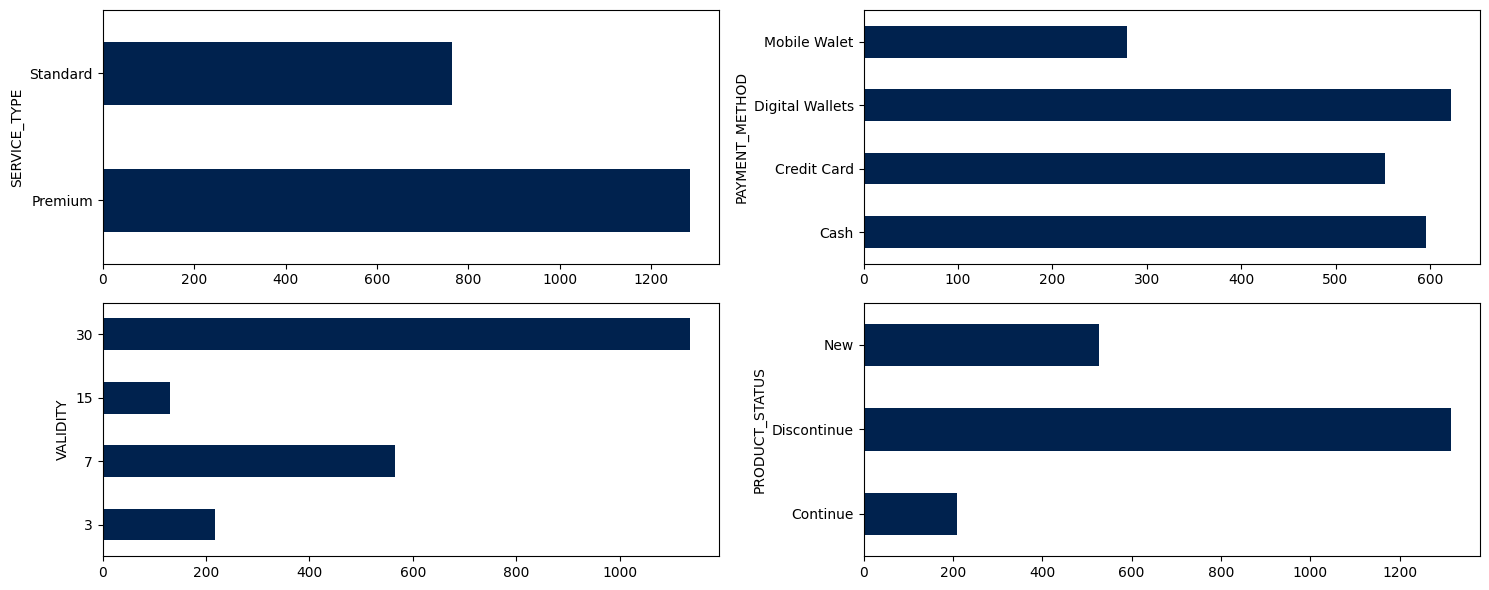

In [35]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
df_pc.SERVICE_TYPE.value_counts().sort_index().plot(kind='barh', cmap='cividis');
plt.subplot(2, 2, 2)
df_pc.PAYMENT_METHOD.value_counts().sort_index().plot(kind='barh', cmap='cividis');
plt.subplot(2, 2, 3)
df_pc.VALIDITY.value_counts().sort_index().plot(kind='barh', cmap='cividis');
plt.subplot(2, 2, 4)
df_pc.PRODUCT_STATUS.value_counts().sort_index().plot(kind='barh', cmap='cividis');
plt.tight_layout()

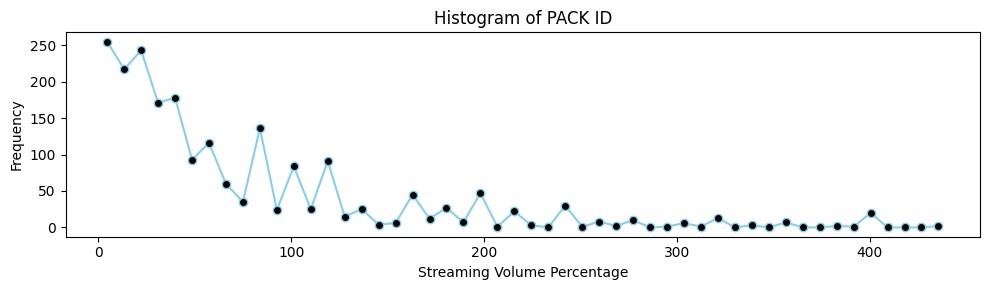

In [36]:
xli = df_pc['DATA_VOL_GB'].tolist()

# Calculate the histogram data
counts, bin_edges = np.histogram(xli, bins=50)

# Calculate the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the histogram as a line plot
plt.figure(figsize=(10, 3))
plt.plot(bin_centers, counts, color='skyblue', linestyle='-', marker='o', markerfacecolor='black')

# Adding titles and labels
plt.xlabel('Streaming Volume Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of PACK ID')

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()

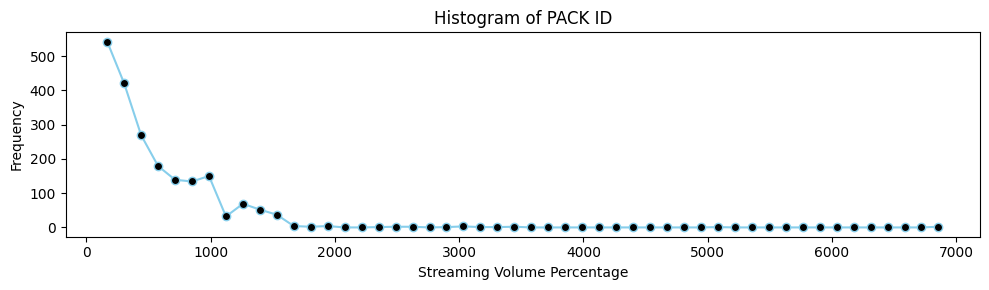

In [37]:
xli = df_pc['PACK_PRICE'].tolist()

# Calculate the histogram data
counts, bin_edges = np.histogram(xli, bins=50)

# Calculate the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the histogram as a line plot
plt.figure(figsize=(10, 3))
plt.plot(bin_centers, counts, color='skyblue', linestyle='-', marker='o', markerfacecolor='black')

# Adding titles and labels
plt.xlabel('Streaming Volume Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of PACK ID')

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()

In [38]:
## group by customer id and sort by event date

sorted_df = df_pp.groupby('CUSTOMER_ID').apply(lambda x: x.sort_values('EVENT_DATE', ascending=False)).reset_index(drop=True)
sorted_df

/tmp/ipykernel_146521/316024022.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sorted_df = df_pp.groupby('CUSTOMER_ID').apply(lambda x: x.sort_values('EVENT_DATE', ascending=False)).reset_index(drop=True)


,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS,year,month
0,2019-09-03,CD1D5D15041AD0,899,1,2019,9
1,2019-06-30,CD1D60A2535570,765,1,2019,6
2,2019-05-23,CD1D60AB986EA8,28,1,2019,5
3,2019-07-09,CD1D60C1412B40,1969,1,2019,7
4,2019-07-04,CD1D60C1412B40,1969,1,2019,7
...,...,...,...,...,...,...
1208705,2019-06-21,CD223A7CE260D4,1713,1,2019,6
1208706,2019-05-22,CD223A7CE260D4,942,1,2019,5
1208707,2019-08-14,CD223EEE99E08F,136,1,2019,8
1208708,2019-08-09,CD223EEE99E08F,1048,1,2019,8


In [39]:
df_ppn = sorted_df.copy()
df_ppn[:10]

,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS,year,month
0,2019-09-03,CD1D5D15041AD0,899,1,2019,9
1,2019-06-30,CD1D60A2535570,765,1,2019,6
2,2019-05-23,CD1D60AB986EA8,28,1,2019,5
3,2019-07-09,CD1D60C1412B40,1969,1,2019,7
4,2019-07-04,CD1D60C1412B40,1969,1,2019,7
5,2019-06-29,CD1D60C1412B40,1969,1,2019,6
6,2019-06-22,CD1D60C1412B40,1969,1,2019,6
7,2019-06-09,CD1D60C1412B40,1969,1,2019,6
8,2019-05-21,CD1D60C1412B40,653,1,2019,5
9,2019-09-12,CD1D60C21B3815,241,1,2019,9


In [40]:
print(df_dc.shape)
print()
print(df_cp.shape)
print()
print(df_pc.shape)
print(df_pp.shape)

(23375373, 6)

(340697, 15)

(2049, 7)
(1208710, 6)


In [41]:
df_cp.head(3)

,CUSTOMER_ID,SERVICE_TYPE,FIRST_CONNECTION_DATE,CONNECTION_TYPE,ROUTER_CATEGORY,STREAMING_VOL_PERCENTAGE,WEB_BROWSING_VOL_PERCENTAGE,IM_VOICE_CALL_VOL_PERCENTAGE,SNS_VOL_PERCENTAGE,FILE_ACCESS_VOL_PERCENTAGE,GAME_VOL_PERCENTAGE,NAVIGATION_VOL_PERCENTAGE,EMAIL_VOL_PERCENTAGE,OTHERS_VOL_PERCENTAGE,year
0,CD1F7653F6BE80,1,2019-12-31,0,0,70.0205,14.6609,3.6914,8.5530,2.1653,0.0297,0.0376,0.0000,0.8416,2019
1,CD1F768EE45143,1,2021-11-07,1,1,72.1494,11.6056,3.2767,1.6749,10.2768,0.0000,0.2096,0.0000,0.8069,2021
2,CD1F769AD050BF,1,2023-01-12,0,1,47.3220,18.2921,3.2387,20.0176,3.9060,0.0180,0.0540,0.0506,7.1010,2023


In [42]:
df_cp.dropna(inplace=True)

In [43]:
merged_df = pd.merge(df_ppn, df_cp, on='CUSTOMER_ID', how='inner')

# Print the shape of the merged dataframe
print(merged_df.shape)

# Display the first few rows of the merged dataframe
merged_df[:10]

(1205510, 20)


,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS,year_x,month,SERVICE_TYPE,FIRST_CONNECTION_DATE,CONNECTION_TYPE,ROUTER_CATEGORY,STREAMING_VOL_PERCENTAGE,WEB_BROWSING_VOL_PERCENTAGE,IM_VOICE_CALL_VOL_PERCENTAGE,SNS_VOL_PERCENTAGE,FILE_ACCESS_VOL_PERCENTAGE,GAME_VOL_PERCENTAGE,NAVIGATION_VOL_PERCENTAGE,EMAIL_VOL_PERCENTAGE,OTHERS_VOL_PERCENTAGE,year_y
0,2019-09-03,CD1D5D15041AD0,899,1,2019,9,1,2020-02-03,2,0,50.0364,25.7554,12.2222,1.2339,9.6390,0.0085,0.2086,0.0,0.8960,2020
1,2019-06-30,CD1D60A2535570,765,1,2019,6,1,2019-11-21,1,0,63.0056,13.9577,12.0097,7.4318,0.2740,0.0008,0.0000,0.0,3.3204,2019
2,2019-05-23,CD1D60AB986EA8,28,1,2019,5,1,2020-03-21,1,0,31.6600,5.8457,42.4100,18.0894,1.6197,0.0072,0.0033,0.0,0.3646,2020
3,2019-07-09,CD1D60C1412B40,1969,1,2019,7,0,2019-12-07,2,0,65.4430,16.9810,4.7375,8.9215,2.5973,0.0003,0.0315,0.0,1.2878,2019
4,2019-07-04,CD1D60C1412B40,1969,1,2019,7,0,2019-12-07,2,0,65.4430,16.9810,4.7375,8.9215,2.5973,0.0003,0.0315,0.0,1.2878,2019
5,2019-06-29,CD1D60C1412B40,1969,1,2019,6,0,2019-12-07,2,0,65.4430,16.9810,4.7375,8.9215,2.5973,0.0003,0.0315,0.0,1.2878,2019
6,2019-06-22,CD1D60C1412B40,1969,1,2019,6,0,2019-12-07,2,0,65.4430,16.9810,4.7375,8.9215,2.5973,0.0003,0.0315,0.0,1.2878,2019
7,2019-06-09,CD1D60C1412B40,1969,1,2019,6,0,2019-12-07,2,0,65.4430,16.9810,4.7375,8.9215,2.5973,0.0003,0.0315,0.0,1.2878,2019
8,2019-05-21,CD1D60C1412B40,653,1,2019,5,0,2019-12-07,2,0,65.4430,16.9810,4.7375,8.9215,2.5973,0.0003,0.0315,0.0,1.2878,2019
9,2019-09-12,CD1D60C21B3815,241,1,2019,9,0,2022-07-17,2,1,47.8263,30.7888,11.6569,3.1232,0.4289,0.0000,0.0000,0.0,6.1759,2022


### Product Catalogue Info

In [44]:
df_pc.head(3)

,PACK_ID,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS
0,1,Standard,Digital Wallets,1298,30,320.0,Discontinue
1,2,Standard,Cash,328,30,24.0,Continue
2,3,Premium,Mobile Walet,176,3,24.0,Discontinue


In [45]:
df_pc = df_pc.rename(columns={'SERVICE_TYPE': 'SERVICE_TYPE_PACK'})

In [46]:
mapping_dic = {'Premium': 0, 'Standard': 1}
mapping_dic2 = {'Cash': 0, 'Mobile Walet': 1, 'Digital Wallets':  2, 'Credit Card': 3}

In [47]:
df_pc['SERVICE_TYPE_PACK'] = df_pc['SERVICE_TYPE_PACK'].map(mapping_dic)
df_pc['PAYMENT_METHOD'] = df_pc['PAYMENT_METHOD'].map(mapping_dic2)

In [48]:
df_pc.head()

,PACK_ID,SERVICE_TYPE_PACK,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS
0,1,1,2,1298,30,320.0,Discontinue
1,2,1,0,328,30,24.0,Continue
2,3,0,1,176,3,24.0,Discontinue
3,4,0,0,558,15,64.0,Discontinue
4,5,0,0,300,7,20.0,New


In [49]:
df_pc.columns

Index(['PACK_ID', 'SERVICE_TYPE_PACK', 'PAYMENT_METHOD', 'PACK_PRICE',
       'VALIDITY', 'DATA_VOL_GB', 'PRODUCT_STATUS'],
      dtype='object')

### filter the product catalogue to extract the new prodcut info's

In [50]:
new_product = df_pc[df_pc['PRODUCT_STATUS']=='New'].reset_index(drop=True)
packli = new_product.PACK_ID.tolist()
new_product

,PACK_ID,SERVICE_TYPE_PACK,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS
0,5,0,0,300,7,20.0,New
1,10,0,0,440,7,80.0,New
2,14,1,3,136,7,12.0,New
3,22,1,1,394,30,64.0,New
4,23,0,1,476,7,88.0,New
...,...,...,...,...,...,...,...
522,2042,1,2,798,30,160.0,New
523,2046,1,3,178,7,14.0,New
524,2051,0,3,136,7,24.0,New
525,2053,0,0,476,7,112.0,New


In [51]:
new_product.columns

Index(['PACK_ID', 'SERVICE_TYPE_PACK', 'PAYMENT_METHOD', 'PACK_PRICE',
       'VALIDITY', 'DATA_VOL_GB', 'PRODUCT_STATUS'],
      dtype='object')

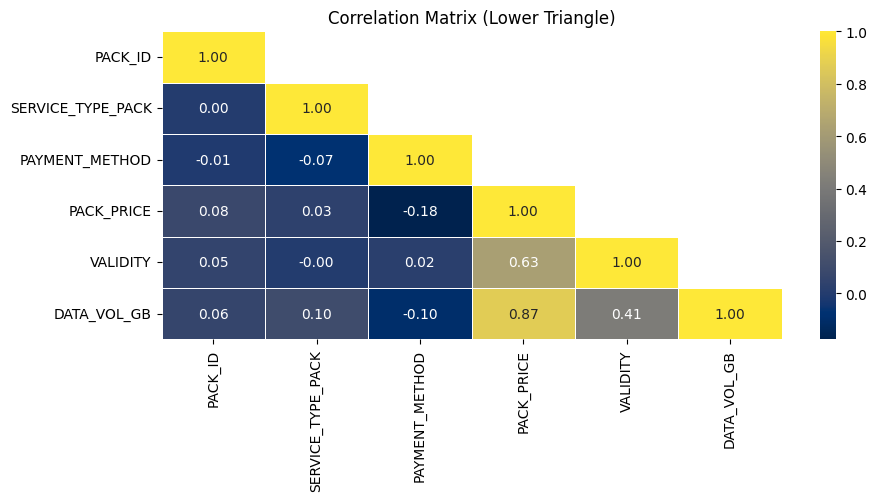

In [52]:
# Compute the correlation matrix
numerical_cols = ['PACK_ID', 'SERVICE_TYPE_PACK', 'PAYMENT_METHOD', 'PACK_PRICE',
       'VALIDITY', 'DATA_VOL_GB']

corr_matrix = new_product[numerical_cols].corr()
mask = np.tril(np.ones_like(corr_matrix, dtype=bool))
corr_matrix_lower = corr_matrix.mask(~mask)
plt.figure(figsize=(10, 4))
sns.heatmap(corr_matrix_lower, annot=True, cmap='cividis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Lower Triangle)')
plt.show()


In [53]:
merged_df.head(3)

,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS,year_x,month,SERVICE_TYPE,FIRST_CONNECTION_DATE,CONNECTION_TYPE,ROUTER_CATEGORY,STREAMING_VOL_PERCENTAGE,WEB_BROWSING_VOL_PERCENTAGE,IM_VOICE_CALL_VOL_PERCENTAGE,SNS_VOL_PERCENTAGE,FILE_ACCESS_VOL_PERCENTAGE,GAME_VOL_PERCENTAGE,NAVIGATION_VOL_PERCENTAGE,EMAIL_VOL_PERCENTAGE,OTHERS_VOL_PERCENTAGE,year_y
0,2019-09-03,CD1D5D15041AD0,899,1,2019,9,1,2020-02-03,2,0,50.0364,25.7554,12.2222,1.2339,9.6390,0.0085,0.2086,0.0,0.8960,2020
1,2019-06-30,CD1D60A2535570,765,1,2019,6,1,2019-11-21,1,0,63.0056,13.9577,12.0097,7.4318,0.2740,0.0008,0.0000,0.0,3.3204,2019
2,2019-05-23,CD1D60AB986EA8,28,1,2019,5,1,2020-03-21,1,0,31.6600,5.8457,42.4100,18.0894,1.6197,0.0072,0.0033,0.0,0.3646,2020


In [54]:
df_pc.head(3)

,PACK_ID,SERVICE_TYPE_PACK,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS
0,1,1,2,1298,30,320.0,Discontinue
1,2,1,0,328,30,24.0,Continue
2,3,0,1,176,3,24.0,Discontinue


### merge the product catalogue info also

In [55]:
merged_df1 = pd.merge(merged_df, df_pc, on='PACK_ID', how='inner')

# Print the shape of the merged dataframe
print(merged_df1.shape)

# Display the first few rows of the merged dataframe
merged_df1.head()

(1205510, 26)


,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS,year_x,month,SERVICE_TYPE,FIRST_CONNECTION_DATE,CONNECTION_TYPE,ROUTER_CATEGORY,...,NAVIGATION_VOL_PERCENTAGE,EMAIL_VOL_PERCENTAGE,OTHERS_VOL_PERCENTAGE,year_y,SERVICE_TYPE_PACK,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS
0,2019-09-03,CD1D5D15041AD0,899,1,2019,9,1,2020-02-03,2,0,...,0.2086,0.0,0.8960,2020,1,2,264,30,40.0,Discontinue
1,2019-06-30,CD1D60A2535570,765,1,2019,6,1,2019-11-21,1,0,...,0.0000,0.0,3.3204,2019,1,2,136,3,16.8,Discontinue
2,2019-05-23,CD1D60AB986EA8,28,1,2019,5,1,2020-03-21,1,0,...,0.0033,0.0,0.3646,2020,1,1,798,30,80.0,Discontinue
3,2019-07-09,CD1D60C1412B40,1969,1,2019,7,0,2019-12-07,2,0,...,0.0315,0.0,1.2878,2019,0,3,192,3,32.0,Discontinue
4,2019-07-04,CD1D60C1412B40,1969,1,2019,7,0,2019-12-07,2,0,...,0.0315,0.0,1.2878,2019,0,3,192,3,32.0,Discontinue


In [56]:
merged_df1.columns

Index(['EVENT_DATE', 'CUSTOMER_ID', 'PACK_ID', 'HITS', 'year_x', 'month',
       'SERVICE_TYPE', 'FIRST_CONNECTION_DATE', 'CONNECTION_TYPE',
       'ROUTER_CATEGORY', 'STREAMING_VOL_PERCENTAGE',
       'WEB_BROWSING_VOL_PERCENTAGE', 'IM_VOICE_CALL_VOL_PERCENTAGE',
       'SNS_VOL_PERCENTAGE', 'FILE_ACCESS_VOL_PERCENTAGE',
       'GAME_VOL_PERCENTAGE', 'NAVIGATION_VOL_PERCENTAGE',
       'EMAIL_VOL_PERCENTAGE', 'OTHERS_VOL_PERCENTAGE', 'year_y',
       'SERVICE_TYPE_PACK', 'PAYMENT_METHOD', 'PACK_PRICE', 'VALIDITY',
       'DATA_VOL_GB', 'PRODUCT_STATUS'],
      dtype='object')

In [57]:
merged_df1.PRODUCT_STATUS.value_counts()

PRODUCT_STATUS
Discontinue    1082755
Continue        122755
Name: count, dtype: int64

In [58]:
merged_df.dtypes

EVENT_DATE                      datetime64[ns]
CUSTOMER_ID                             object
PACK_ID                                  int64
HITS                                     int64
year_x                                   int32
month                                    int32
SERVICE_TYPE                             int64
FIRST_CONNECTION_DATE           datetime64[ns]
CONNECTION_TYPE                          int64
ROUTER_CATEGORY                          int64
STREAMING_VOL_PERCENTAGE               float64
WEB_BROWSING_VOL_PERCENTAGE            float64
IM_VOICE_CALL_VOL_PERCENTAGE           float64
SNS_VOL_PERCENTAGE                     float64
FILE_ACCESS_VOL_PERCENTAGE             float64
GAME_VOL_PERCENTAGE                    float64
NAVIGATION_VOL_PERCENTAGE              float64
EMAIL_VOL_PERCENTAGE                   float64
OTHERS_VOL_PERCENTAGE                  float64
year_y                                   int32
dtype: object

In [59]:
merged_df1[:10]

,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS,year_x,month,SERVICE_TYPE,FIRST_CONNECTION_DATE,CONNECTION_TYPE,ROUTER_CATEGORY,...,NAVIGATION_VOL_PERCENTAGE,EMAIL_VOL_PERCENTAGE,OTHERS_VOL_PERCENTAGE,year_y,SERVICE_TYPE_PACK,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS
0,2019-09-03,CD1D5D15041AD0,899,1,2019,9,1,2020-02-03,2,0,...,0.2086,0.0,0.8960,2020,1,2,264,30,40.0,Discontinue
1,2019-06-30,CD1D60A2535570,765,1,2019,6,1,2019-11-21,1,0,...,0.0000,0.0,3.3204,2019,1,2,136,3,16.8,Discontinue
2,2019-05-23,CD1D60AB986EA8,28,1,2019,5,1,2020-03-21,1,0,...,0.0033,0.0,0.3646,2020,1,1,798,30,80.0,Discontinue
3,2019-07-09,CD1D60C1412B40,1969,1,2019,7,0,2019-12-07,2,0,...,0.0315,0.0,1.2878,2019,0,3,192,3,32.0,Discontinue
4,2019-07-04,CD1D60C1412B40,1969,1,2019,7,0,2019-12-07,2,0,...,0.0315,0.0,1.2878,2019,0,3,192,3,32.0,Discontinue
5,2019-06-29,CD1D60C1412B40,1969,1,2019,6,0,2019-12-07,2,0,...,0.0315,0.0,1.2878,2019,0,3,192,3,32.0,Discontinue
6,2019-06-22,CD1D60C1412B40,1969,1,2019,6,0,2019-12-07,2,0,...,0.0315,0.0,1.2878,2019,0,3,192,3,32.0,Discontinue
7,2019-06-09,CD1D60C1412B40,1969,1,2019,6,0,2019-12-07,2,0,...,0.0315,0.0,1.2878,2019,0,3,192,3,32.0,Discontinue
8,2019-05-21,CD1D60C1412B40,653,1,2019,5,0,2019-12-07,2,0,...,0.0315,0.0,1.2878,2019,0,3,192,3,40.0,Discontinue
9,2019-09-12,CD1D60C21B3815,241,1,2019,9,0,2022-07-17,2,1,...,0.0000,0.0,6.1759,2022,0,1,336,7,44.0,Continue


In [60]:
mapping_dic = {'Premium': 0, 'Standard': 1}
mapping_dic2 = {'Cash': 0, 'Mobile Walet': 1, 'Digital Wallets':  2, 'Credit Card': 3}

In [61]:
# merged_df1['SERVICE_TYPE_PACK'] = merged_df1['SERVICE_TYPE_PACK'].map(mapping_dic)
# merged_df1['PAYMENT_METHOD'] = merged_df1['PAYMENT_METHOD'].map(mapping_dic2)

In [62]:
merged_df1.columns

Index(['EVENT_DATE', 'CUSTOMER_ID', 'PACK_ID', 'HITS', 'year_x', 'month',
       'SERVICE_TYPE', 'FIRST_CONNECTION_DATE', 'CONNECTION_TYPE',
       'ROUTER_CATEGORY', 'STREAMING_VOL_PERCENTAGE',
       'WEB_BROWSING_VOL_PERCENTAGE', 'IM_VOICE_CALL_VOL_PERCENTAGE',
       'SNS_VOL_PERCENTAGE', 'FILE_ACCESS_VOL_PERCENTAGE',
       'GAME_VOL_PERCENTAGE', 'NAVIGATION_VOL_PERCENTAGE',
       'EMAIL_VOL_PERCENTAGE', 'OTHERS_VOL_PERCENTAGE', 'year_y',
       'SERVICE_TYPE_PACK', 'PAYMENT_METHOD', 'PACK_PRICE', 'VALIDITY',
       'DATA_VOL_GB', 'PRODUCT_STATUS'],
      dtype='object')

In [63]:
merged_df1.PAYMENT_METHOD.value_counts()

PAYMENT_METHOD
0    688574
1    185980
2    176498
3    154458
Name: count, dtype: int64

In [64]:
new_product[:10]

,PACK_ID,SERVICE_TYPE_PACK,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS
0,5,0,0,300,7,20.0,New
1,10,0,0,440,7,80.0,New
2,14,1,3,136,7,12.0,New
3,22,1,1,394,30,64.0,New
4,23,0,1,476,7,88.0,New
5,24,1,3,136,7,6.0,New
6,29,0,1,1396,30,220.0,New
7,32,1,3,216,30,28.0,New
8,38,0,2,1540,30,400.0,New
9,40,1,2,310,7,40.0,New


In [65]:
xn = 1111
merged_df1[xn:xn+5]

,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS,year_x,month,SERVICE_TYPE,FIRST_CONNECTION_DATE,CONNECTION_TYPE,ROUTER_CATEGORY,...,NAVIGATION_VOL_PERCENTAGE,EMAIL_VOL_PERCENTAGE,OTHERS_VOL_PERCENTAGE,year_y,SERVICE_TYPE_PACK,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS
1111,2019-08-18,CD1F76976949B1,1085,1,2019,8,1,2021-11-21,0,1,...,0.0161,0.0,0.9606,2021,1,0,798,30,64.0,Discontinue
1112,2019-07-18,CD1F76976949B1,1713,1,2019,7,1,2021-11-21,0,1,...,0.0161,0.0,0.9606,2021,1,0,1196,30,220.0,Discontinue
1113,2019-08-30,CD1F769769C1CD,1960,1,2019,8,1,2021-11-22,0,0,...,0.0046,0.0,1.6949,2021,1,0,114,3,10.0,Discontinue
1114,2019-09-30,CD1F76976EEB01,364,1,2019,9,1,2022-01-20,0,0,...,0.1915,0.0,3.0243,2022,1,3,400,30,68.0,Discontinue
1115,2019-06-26,CD1F7697719DA2,41,1,2019,6,1,2022-06-25,0,1,...,0.0258,0.0,3.5358,2022,1,2,418,15,48.0,Discontinue


In [66]:
merged_df1.shape

(1205510, 26)

## This filter helps to make the computation 7.44X times faster

In [67]:
id_list = sample_subq1.CUSTOMER_ID.tolist()
id_list[:3]

['CD1F7B49575998', 'CD1F7B86F083B7', 'CD1F7C8C57DA02']

In [68]:
print(merged_df1.shape)
# Filter the DataFrame
merged_df2 = merged_df1[merged_df1['CUSTOMER_ID'].isin(id_list)]
print(merged_df2.shape)

(1205510, 26)
(161948, 26)


In [69]:
tm = merged_df1.shape[0] / merged_df2.shape[0]
print(f'This filter helps to make the computation {tm:.2f} times faster')

This filter helps to make the computation 7.44 times faster


In [70]:
merged_df2['PER_GB'] = merged_df2['PACK_PRICE'] / merged_df2['DATA_VOL_GB']
merged_df2.head()

/tmp/ipykernel_146521/291532288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df2['PER_GB'] = merged_df2['PACK_PRICE'] / merged_df2['DATA_VOL_GB']


,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS,year_x,month,SERVICE_TYPE,FIRST_CONNECTION_DATE,CONNECTION_TYPE,ROUTER_CATEGORY,...,EMAIL_VOL_PERCENTAGE,OTHERS_VOL_PERCENTAGE,year_y,SERVICE_TYPE_PACK,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,PER_GB
102,2019-09-25,CD1D7A9E382165,1258,1,2019,9,0,2019-05-13,0,1,...,0.0,1.1664,2019,0,3,350,30,40.0,Discontinue,8.750000
103,2019-08-07,CD1D7A9E382165,1894,1,2019,8,0,2019-05-13,0,1,...,0.0,1.1664,2019,0,3,700,30,120.0,Discontinue,5.833333
104,2019-07-16,CD1D7A9E382165,1086,1,2019,7,0,2019-05-13,0,1,...,0.0,1.1664,2019,0,1,558,15,44.0,Discontinue,12.681818
105,2019-06-28,CD1D7A9E382165,4,1,2019,6,0,2019-05-13,0,1,...,0.0,1.1664,2019,0,0,558,15,64.0,Discontinue,8.718750
106,2019-06-11,CD1D7A9E382165,4,1,2019,6,0,2019-05-13,0,1,...,0.0,1.1664,2019,0,0,558,15,64.0,Discontinue,8.718750


In [71]:
new_product['PER_GB'] = new_product['PACK_PRICE'] / new_product['DATA_VOL_GB']
new_product.head()

,PACK_ID,SERVICE_TYPE_PACK,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,PER_GB
0,5,0,0,300,7,20.0,New,15.000000
1,10,0,0,440,7,80.0,New,5.500000
2,14,1,3,136,7,12.0,New,11.333333
3,22,1,1,394,30,64.0,New,6.156250
4,23,0,1,476,7,88.0,New,5.409091


In [72]:
merged_df2.tail(3)

,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS,year_x,month,SERVICE_TYPE,FIRST_CONNECTION_DATE,CONNECTION_TYPE,ROUTER_CATEGORY,...,EMAIL_VOL_PERCENTAGE,OTHERS_VOL_PERCENTAGE,year_y,SERVICE_TYPE_PACK,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,PER_GB
1205295,2019-07-27,CD220DAEB7B174,1225,1,2019,7,1,2019-04-10,1,1,...,0.0005,0.6743,2019,1,1,994,30,172.0,Discontinue,5.779070
1205296,2019-07-07,CD220DAEB7B174,1344,1,2019,7,1,2019-04-10,1,1,...,0.0005,0.6743,2019,1,1,994,30,140.0,Discontinue,7.100000
1205297,2019-06-19,CD220DAEB7B174,650,1,2019,6,1,2019-04-10,1,1,...,0.0005,0.6743,2019,1,0,994,30,128.0,Discontinue,7.765625


## Experimentation Section

In [73]:
filt = merged_df2[merged_df2['CUSTOMER_ID'] == 'CD220DAEB7B174']
filt

,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS,year_x,month,SERVICE_TYPE,FIRST_CONNECTION_DATE,CONNECTION_TYPE,ROUTER_CATEGORY,...,EMAIL_VOL_PERCENTAGE,OTHERS_VOL_PERCENTAGE,year_y,SERVICE_TYPE_PACK,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,PER_GB
1205293,2019-09-17,CD220DAEB7B174,879,1,2019,9,1,2019-04-10,1,1,...,0.0005,0.6743,2019,1,1,1196,30,228.0,Discontinue,5.245614
1205294,2019-08-18,CD220DAEB7B174,1217,1,2019,8,1,2019-04-10,1,1,...,0.0005,0.6743,2019,1,1,994,30,200.0,Continue,4.970000
1205295,2019-07-27,CD220DAEB7B174,1225,1,2019,7,1,2019-04-10,1,1,...,0.0005,0.6743,2019,1,1,994,30,172.0,Discontinue,5.779070
1205296,2019-07-07,CD220DAEB7B174,1344,1,2019,7,1,2019-04-10,1,1,...,0.0005,0.6743,2019,1,1,994,30,140.0,Discontinue,7.100000
1205297,2019-06-19,CD220DAEB7B174,650,1,2019,6,1,2019-04-10,1,1,...,0.0005,0.6743,2019,1,0,994,30,128.0,Discontinue,7.765625


In [74]:
filt['SERVICE_TYPE_PACK']

1205293    1
1205294    1
1205295    1
1205296    1
1205297    1
Name: SERVICE_TYPE_PACK, dtype: int64

In [75]:
filt['PACK_PRICE']

1205293    1196
1205294     994
1205295     994
1205296     994
1205297     994
Name: PACK_PRICE, dtype: int64

In [76]:
filt['PAYMENT_METHOD']

1205293    1
1205294    1
1205295    1
1205296    1
1205297    0
Name: PAYMENT_METHOD, dtype: int64

In [77]:
filt['VALIDITY']

1205293    30
1205294    30
1205295    30
1205296    30
1205297    30
Name: VALIDITY, dtype: int64

In [78]:
filt['DATA_VOL_GB']

1205293    228.0
1205294    200.0
1205295    172.0
1205296    140.0
1205297    128.0
Name: DATA_VOL_GB, dtype: float64

In [79]:

def find_median(arr):
    return np.median(arr)

array = [40, 64, 48, 64]
median = find_median(array)
print("Median:", median)


Median: 56.0


In [80]:
filt['PER_GB']

1205293    5.245614
1205294    4.970000
1205295    5.779070
1205296    7.100000
1205297    7.765625
Name: PER_GB, dtype: float64

In [83]:
import statistics


In [84]:
stp = statistics.mode(filt['SERVICE_TYPE_PACK'].tolist())
pp = np.median(filt['PACK_PRICE'].tolist())
pm = statistics.mode(filt['PAYMENT_METHOD'].tolist())
val = statistics.mode(filt['VALIDITY'].tolist())
datavol = np.median(filt['DATA_VOL_GB'].tolist())
pergb = np.median(filt['PER_GB'].tolist())
        
condition1 = new_product['PACK_PRICE'] <= pp
condition2 = new_product['SERVICE_TYPE_PACK'] == stp
condition3 = new_product['PAYMENT_METHOD'] == pm
condition4 = new_product['VALIDITY'] == val
condition5 = new_product['DATA_VOL_GB'] >= datavol
condition6 = new_product['PER_GB'] <= pergb
    
combined_conditions = condition1 & condition2 & condition3 & condition4 & condition5 & condition6

# Apply the combined conditions to filter the dataframe
xd = new_product[combined_conditions]

In [85]:
xd

,PACK_ID,SERVICE_TYPE_PACK,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,PER_GB
410,1581,1,1,994,30,220.0,New,4.518182
504,1980,1,1,994,30,208.0,New,4.778846


In [86]:
datavol

172.0

In [88]:
# new_product.DATA_VOL_GB.value_counts()

In [89]:
sample_subq1.head()

,CUSTOMER_ID,PACK_ID
0,CD1F7B49575998,-5
1,CD1F7B86F083B7,-5
2,CD1F7C8C57DA02,-5
3,CD1F7DA21C1ED4,-5
4,CD1F7EBFC7032A,-5


In [90]:
sample_subq1.shape

(17843, 2)

In [92]:
# mapping_dic = {'Premium': 0, 'Standard': 1}
# mapping_dic2 = {'Cash': 0, 'Mobile Walet': 1, 'Digital Wallets':  2, 'Credit Card': 3}
import statistics

arr = [0, 0, 0, 0, 1, 0]
mode_value = statistics.mode(arr)

print("The mode of the array is:", mode_value)

The mode of the array is: 0


## Demo Run

In [93]:
n = 10033
n = 1222
for index, row in sample_subq1[n:n+10].iterrows():
    
    print(row['CUSTOMER_ID'])
    filt = merged_df2[merged_df2['CUSTOMER_ID'] == row['CUSTOMER_ID']]
    # filt = filt[:1]
    stp = statistics.mode(filt['SERVICE_TYPE_PACK'].tolist())
    pp = np.median(filt['PACK_PRICE'].tolist())
    pm = statistics.mode(filt['PAYMENT_METHOD'].tolist())
    val = statistics.mode(filt['VALIDITY'].tolist())
    datavol = np.median(filt['DATA_VOL_GB'].tolist())
    pergb = np.mean(filt['PER_GB'].tolist())
    
    condition1 = new_product['PACK_PRICE'] <= pp
    condition2 = new_product['SERVICE_TYPE_PACK'] == stp
    condition3 = new_product['PAYMENT_METHOD'] == pm
    condition4 = new_product['VALIDITY'] == val
    condition5 = new_product['DATA_VOL_GB'] >= datavol
    condition6 = new_product['PER_GB'] <= pergb

    combined_conditions = condition1 & condition2 & condition3 & condition4 & condition5 & condition6

    # Apply the combined conditions to filter the dataframe
    xd = new_product[combined_conditions]
    xx = xd['PACK_ID'].tolist()
    
    if xx:
        if(len(xx) > 1):
            min_price_index = xd['PACK_PRICE'].idxmin()

            # Get the pack_id with the lowest per_gb_price
            lowest_price_pack_id = xd.loc[min_price_index, 'PACK_ID']
            print(f'lowest pgb = {lowest_price_pack_id}')
            sample_subq1.loc[index, 'PACK_ID'] = lowest_price_pack_id
        else:
            sample_subq1.loc[index, 'PACK_ID'] = xx[0]
        print(xx)
    else:
        # print(-1)
        sample_subq1.loc[index, 'PACK_ID'] = -1
xx

CD20FD7EE3412D
CD20FDF0AD4BFF
CD20FDFBA76F19
[517]
CD20FF5ACBEAE9
[1619]
CD20FFCDD6E08B
[370]
CD20FFEC03C360
[908]
CD210079215B01
CD21022AF4E34C
lowest pgb = 190
[190, 437, 1355]
CD2104CF22E4FC
CD21074E7BD890
[304]


[304]

In [94]:
merged_df2[merged_df2['CUSTOMER_ID'] == 'CD21022AF4E34C']

,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS,year_x,month,SERVICE_TYPE,FIRST_CONNECTION_DATE,CONNECTION_TYPE,ROUTER_CATEGORY,...,EMAIL_VOL_PERCENTAGE,OTHERS_VOL_PERCENTAGE,year_y,SERVICE_TYPE_PACK,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,PER_GB
384237,2019-09-24,CD21022AF4E34C,1597,1,2019,9,0,2021-09-05,2,1,...,0.0,0.0487,2021,0,1,996,30,100.0,Discontinue,9.960000
384238,2019-09-01,CD21022AF4E34C,780,1,2019,9,0,2021-09-05,2,1,...,0.0,0.0487,2021,0,0,996,30,100.0,Discontinue,9.960000
384239,2019-08-02,CD21022AF4E34C,1212,1,2019,8,0,2021-09-05,2,1,...,0.0,0.0487,2021,0,1,994,30,100.0,Discontinue,9.940000
384240,2019-07-11,CD21022AF4E34C,1685,1,2019,7,0,2021-09-05,2,1,...,0.0,0.0487,2021,0,1,994,30,92.0,Discontinue,10.804348
384241,2019-07-04,CD21022AF4E34C,1140,1,2019,7,0,2021-09-05,2,1,...,0.0,0.0487,2021,0,1,388,7,44.0,Discontinue,8.818182
384242,2019-07-01,CD21022AF4E34C,459,1,2019,7,0,2021-09-05,2,1,...,0.0,0.0487,2021,0,1,228,3,44.0,Discontinue,5.181818
384243,2019-06-27,CD21022AF4E34C,459,1,2019,6,0,2021-09-05,2,1,...,0.0,0.0487,2021,0,1,228,3,44.0,Discontinue,5.181818
384244,2019-06-22,CD21022AF4E34C,459,1,2019,6,0,2021-09-05,2,1,...,0.0,0.0487,2021,0,1,228,3,44.0,Discontinue,5.181818
384245,2019-05-23,CD21022AF4E34C,1181,1,2019,5,0,2021-09-05,2,1,...,0.0,0.0487,2021,0,0,994,30,100.0,Discontinue,9.940000


In [95]:
llli = [190, 437, 1355]
new_product[new_product['PACK_ID'].isin(llli)]

,PACK_ID,SERVICE_TYPE_PACK,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,PER_GB
54,190,0,1,796,30,112.0,New,7.107143
118,437,0,1,796,30,144.0,New,5.527778
349,1355,0,1,796,30,96.0,New,8.291667


## Analyzed Points:
* Service pack type is about the same
* Payment methods needs to be same or closer
* validity needs to be same
* data volume can be equal or greater

## The Final Run

In [72]:
n = 100
for index, row in tqdm(sample_subq1[:].iterrows(), total=len(sample_subq1)):
    # print(row['CUSTOMER_ID'])
    filt = merged_df2[merged_df2['CUSTOMER_ID'] == row['CUSTOMER_ID']]
    # filt = filt[:1]
    if not filt.empty:
        
        stp = statistics.mode(filt['SERVICE_TYPE_PACK'].tolist())
        pp = np.median(filt['PACK_PRICE'].tolist())
        pm = statistics.mode(filt['PAYMENT_METHOD'].tolist())
        val = statistics.mode(filt['VALIDITY'].tolist())
        datavol = np.median(filt['DATA_VOL_GB'].tolist())
        pergb = np.median(filt['PER_GB'].tolist())
        
        condition1 = new_product['PACK_PRICE'] <= pp
        condition2 = new_product['SERVICE_TYPE_PACK'] == stp
        condition3 = new_product['PAYMENT_METHOD'] == pm
        condition4 = new_product['VALIDITY'] == val
        condition5 = new_product['DATA_VOL_GB'] >= datavol
        condition6 = new_product['PER_GB'] <= pergb
    
        combined_conditions = condition1 & condition2 & condition3 & condition4 & condition5 & condition6

        # Apply the combined conditions to filter the dataframe
        xd = new_product[combined_conditions]
        xx = xd['PACK_ID'].tolist()
    
        if xx:
            if(len(xx) > 1):
                min_price_index = xd['PACK_PRICE'].idxmin()
    
                # Get the pack_id with the lowest per_gb_price
                lowest_price_pack_id = xd.loc[min_price_index, 'PACK_ID']
                # print(f'lowest pgb = {lowest_price_pack_id}')
                sample_subq1.loc[index, 'PACK_ID'] = lowest_price_pack_id
            else:
                sample_subq1.loc[index, 'PACK_ID'] = xx[0]
            # print(xx)
        else:
            # print(-1)
            sample_subq1.loc[index, 'PACK_ID'] = -1
    else:
        # print(-1)
        sample_subq1.loc[index, 'PACK_ID'] = -1

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17843/17843 [02:25<00:00, 122.69it/s]


### THE FINAL RUN 2.0

In [104]:
for index, row in tqdm(sample_subq1[:].iterrows(), total=len(sample_subq1)):
    # print(row['CUSTOMER_ID'])
    filt = merged_df2[merged_df2['CUSTOMER_ID'] == row['CUSTOMER_ID']]
    # filt = filt[:1]
    if not filt.empty:

        stp = statistics.mean(filt['SERVICE_TYPE_PACK'].tolist())
        pp = np.mean(filt['PACK_PRICE'].tolist())
        pm = statistics.mean(filt['PAYMENT_METHOD'].tolist())
        val = statistics.mean(filt['VALIDITY'].tolist())
        datavol = np.mean(filt['DATA_VOL_GB'].tolist())
        pergb = np.mean(filt['PER_GB'].tolist())
        
        condition1 = new_product['PACK_PRICE'] <= pp
        condition2 = new_product['SERVICE_TYPE_PACK'] == stp
        condition3 = new_product['PAYMENT_METHOD'] == pm
        condition4 = new_product['VALIDITY'] == val
        condition5 = new_product['DATA_VOL_GB'] >= datavol
        condition6 = new_product['PER_GB'] <= pergb
    
        combined_conditions = condition1 & condition2 & condition3 & condition4 & condition5 & condition6

        # Apply the combined conditions to filter the dataframe
        xd = new_product[combined_conditions]
        xx = xd['PACK_ID'].tolist()
    
        if xx:
            if(len(xx) > 1):
                min_price_index = xd['PACK_PRICE'].idxmin()
    
                # Get the pack_id with the lowest per_gb_price
                lowest_price_pack_id = xd.loc[min_price_index, 'PACK_ID']
                # print(f'lowest pgb = {lowest_price_pack_id}')
                sample_subq1.loc[index, 'PACK_ID'] = lowest_price_pack_id
            else:
                sample_subq1.loc[index, 'PACK_ID'] = xx[0]
            # print(xx)
        else:
            # print(-1)
            sample_subq1.loc[index, 'PACK_ID'] = -1
    else:
        # print(-1)
        sample_subq1.loc[index, 'PACK_ID'] = -1

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17843/17843 [02:23<00:00, 124.58it/s]


In [73]:
sample_subq1

,CUSTOMER_ID,PACK_ID
0,CD1F7B49575998,782
1,CD1F7B86F083B7,1227
2,CD1F7C8C57DA02,174
3,CD1F7DA21C1ED4,1403
4,CD1F7EBFC7032A,1108
...,...,...
17838,CD217BB49EA9B0,1619
17839,CD217C02DFF1DD,-1
17840,CD217DC3A65246,-1
17841,CD217F99BA8816,-1


In [74]:
xli = sample_subq1[sample_subq1['PACK_ID'] == -1]
xli.shape[0]/17843

0.41876366081936894

## Another  Version

In [161]:
import pandas as pd
import statistics
from tqdm import tqdm


for index, row in tqdm(sample_subq1[:].iterrows(), total=len(sample_subq1)):
    customer_id = row['CUSTOMER_ID']
    
    # Filter merged_df1 once per customer_id
    filt = merged_df2[merged_df2['CUSTOMER_ID'] == customer_id]
    
    if not filt.empty:
        stp = statistics.mode(filt['SERVICE_TYPE_PACK'])
        pp = statistics.mode(filt['PACK_PRICE'])
        pm = statistics.mode(filt['PAYMENT_METHOD'])
        val = statistics.mode(filt['VALIDITY'])
        datavol = statistics.mode(filt['DATA_VOL_GB'])
        pergb = np.mean(filt['PER_GB'].tolist())

        
        # Combine conditions efficiently
        combined_conditions = (
            (new_product['PACK_PRICE'] <= pp) &
            (new_product['SERVICE_TYPE_PACK'] == stp) &
            (new_product['PAYMENT_METHOD'] == pm) &
            (new_product['VALIDITY'] == val) &
            (new_product['DATA_VOL_GB'] == datavol)
        )
        
        # Apply the combined conditions to filter the dataframe
        xx = new_product[combined_conditions]['PACK_ID'].tolist()
        
        # Assign PACK_ID based on the filtered result
        sample_subq1.loc[index, 'PACK_ID'] = xx[0] if xx else -1
    else:
        sample_subq1.loc[index, 'PACK_ID'] = -1

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17843/17843 [02:28<00:00, 119.93it/s]


In [97]:
# Sample output
sample_subq1[100:110]

,CUSTOMER_ID,PACK_ID
100,CD20EE46863056,275
101,CD20F15E50F3A5,275
102,CD20F3EBACFF73,275
103,CD20F3EDD772B4,275
104,CD20F4F5AACD89,275
105,CD20F549696351,275
106,CD20F575EC87C3,275
107,CD20F5CDD8F4F2,275
108,CD20F7A57782B0,275
109,CD20F8C8BC534D,71


In [98]:
sample_subq1

,CUSTOMER_ID,PACK_ID
0,CD1F7B49575998,2034
1,CD1F7B86F083B7,2034
2,CD1F7C8C57DA02,2034
3,CD1F7DA21C1ED4,2034
4,CD1F7EBFC7032A,2034
...,...,...
17838,CD217BB49EA9B0,275
17839,CD217C02DFF1DD,275
17840,CD217DC3A65246,275
17841,CD217F99BA8816,275


In [99]:
xli = sample_subq1[sample_subq1['PACK_ID'] == -1]
xli.shape[0]/17843

0.00022417754861850587

### SUBMISSION PROCESS

In [100]:
def data_write(file_name, df, buck="not-strong-enough-datathon-3.0"):  
    '''
    This Data write helps us to write the file in our specified bucket.
    '''
    
    # Initialize a boto3 client with your AWS credentials
    # Access key ID & Secret access key shared in your mail
    s3_client = boto3.client(
        's3',
        aws_access_key_id='your_aws_access_key',
        aws_secret_access_key='your_aws_secret_access_key'
    )
    
    ### Read  CSV file from S3
    # Specify your  AWS S3 bucket  name
    bucket_name = buck
    
    ### write CSV file to S3
    write_file_name = file_name
    
    # Convert the dataframe to CSV
    csv_buffer = StringIO()
    df.to_csv(csv_buffer, index = False)
    
    # Write the CSV data to S3
    s3_client.put_object(Bucket=bucket_name, Key=write_file_name, Body=csv_buffer.getvalue())

In [105]:
sample_subq1.to_csv('./output/oitik/q1/q1-ELINfinal.csv', index=False)  

In [106]:
data_write("Q1-submission.csv", sample_subq1)